In [11]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['errorbar.capsize'] = 3

def iniState(N,F,Q):
    return np.random.randint(Q,size=(N,F))

def chooseBlat(a):
    b1=np.random.randint(D*2)
    if b1==0: 
        if (a+1)%L==0:
            b=a+1-L
        else: b=a+1
    elif b1==1:
        if a%L==0:
            b=a-1+L
        else: b=a-1
    elif b1==2: b=a+L
    else: b=a-L
    return b%N

def AdD(D,L):
    # This function returns the sparse adjacency matrix of a d-dimensonal  
    # integer lattice with side L and the total number of elements N=L**d
    # Only for Periodic Boundary Conditions
    
    import scipy.sparse as ss
    N=L**D
    A=ss.dok_matrix((N,N),dtype=int)   # integer
    for i in range(N):
        for j in range(D):
            A[i,(i+L**j)%N] = 1
            A[i,(i-L**j)%N] = 1
    return A.copy()#.tocoo()

def chooseB(a,A):
    return A[a].nonzero()[1][np.random.randint(2*D)]

def calcMag(indi):
    mag=np.zeros((F,Q))
    for f in range(F):
        for q in range(Q):
            for i in range(N):
                if indi[i,f]==q:
                    mag[f,q]+=1
    return mag/N

def Bdx(a):
    if (a+1)%L==0:
        b=a+1-L
    else: b=a+1
    return np.int(b)
        
def Bdw(a):
    b=a+L
    return np.int(b%N)

In [ ]:
%%time

Lv=np.array([100])
D=2
F=10
# Q=14

TN=10000
T=100

nA=np.zeros(TN)

rep=1

Qrange=np.array([100])
qrange=np.arange(Qrange.size)
magv=np.zeros((Lv.size,Qrange.size,rep))
TCv=np.zeros((Lv.size,Qrange.size,rep))

ll=0
for L in Lv:
    N=L**D
    for rip in range(rep):
        q=0
        for Q in Qrange:

            TC=TN-1
            ind=np.zeros((TN+1,N,F),dtype=int)
            ind[0]=iniState(N,F,Q)
            indt=np.zeros((T+1,N,F),dtype=int)
            mag=np.zeros((TN,F,Q))
            
            

            for tnn in np.arange(TN):
                Act=np.zeros((D*N,2),dtype=int)-1
                for ai in range(N):
                    bi=Bdx(ai)
                    if (ind[tnn,ai]==ind[tnn,bi]).any() and (ind[tnn,ai]!=ind[tnn,bi]).any():
                        Act[D*ai]=np.array([ai,bi])

                    ci=Bdw(ai)
                    if(ind[tnn,ai]==ind[tnn,ci]).any() and (ind[tnn,ai]!=ind[tnn,ci]).any():
                        Act[D*ai+1]=np.array([ai,ci])
                        
                nA[tnn]=(Act[:,0]+1).nonzero()[0].size
                
                if nA[tnn]==0:
                    TC=tnn
                    break
                
                mag[tnn]=calcMag(ind[tnn])
                
                indt[0]=ind[tnn].copy()
                for tn in np.arange(T):
                    a=np.random.randint(N)
                    b=chooseBlat(a)

                    indt[tn+1]=indt[tn].copy()

                    if (indt[tn,a]!=indt[tn,b]).any() and (indt[tn,a]==indt[tn,b]).any():
                        c=np.random.randint(F)
                        if indt[tn,a,c]==indt[tn,b,c]:
                            dd=np.random.randint(F)
                            for Fi in range(F):
                                d=(dd+Fi)%F
                                if indt[tn,a,d]!=indt[tn,b,d]:
                                    indt[tn+1,a,d]=indt[tn,b,d].copy()
                                    break

                ind[tnn+1]=indt[tn+1].copy()
                
                print('{}\r'.format(tnn), end="")


            #mag[TC:]=mag[TC]
            magv[ll,q,rip]=np.amax(mag[TC])
            TCv[ll,q,rip]=TC
            q+=1
        
    ll+=1
    
print()
for i in range(Lv.size):
    plt.plot(range(TC),nA[:TC]/N)
    plt.xscale("log")
plt.show()



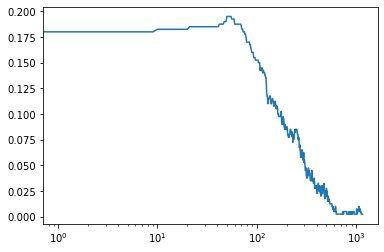

In [84]:
plt.plot(range(TC),nA[:TC]/N)
plt.xscale("log")

In [ ]:
(Act+1).nonzero()

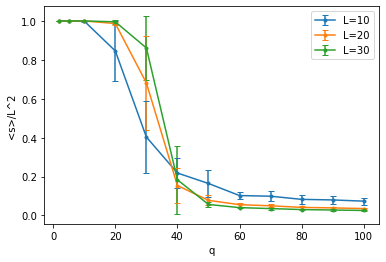

In [9]:
for i in range(Lv.size):
    plt.errorbar(Qrange,magv[i].mean(axis=1),yerr=magv[i].std(axis=1), label="L="+str(Lv[i]), marker='.')
    plt.xlabel('q')
    plt.ylabel('<s>/L^2')
    
plt.legend()
plt.show()

In [ ]:
'''                if (ind[tnn]==0).all():
                    TC=tnn
                    break
                    
                
                
                if tnn>10:
                    if (mag[tnn-3,:,0]==mag[tnn-4,:,0]).all():
                        if(mag[tnn-2,:,0]==mag[tnn-3,:,0]).all():
                            if(mag[tnn-1]==mag[tnn-2]).all():
                                if(mag[tnn]==mag[tnn-1]).all():
                                    TC=tnn-3
                                    break'''